In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
titanic = pd.read_csv(os.getcwd() + '/data/titanic-train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

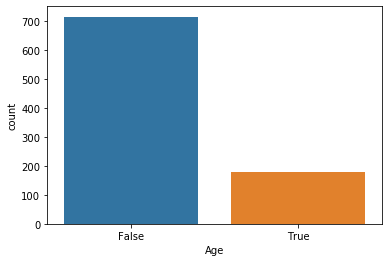

In [15]:
import seaborn as sns
sns.countplot(titanic['Age'].isnull())

In [166]:
n = titanic['Cabin'].nunique()
print("Number of Unique categories:", n)
missing_per = (titanic['Cabin'].isnull().sum()/ titanic['Cabin'].size) * 100
print('Missing percentage: %.2f'% missing_per)

Number of Unique categories: 147
Missing percentage: 77.10


In [4]:
#Deletion - Columns with NAN
df = titanic.copy()
df = df.dropna(axis=1)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

In [144]:
#Deletion - Rows with NAN
dfr = titanic.copy()
dfr.dropna(inplace=True)
dfr.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [145]:
print("After Column removal:", df.shape)
print("After Rows removal:", dfr.shape)

After Column removal: (891, 9)
After Rows removal: (183, 12)


In [8]:
#Mean/Median imputation
dfm = titanic.copy()
dfm['Age'] = dfm['Age'].replace(np.NaN, dfm['Age'].mean())
dfm.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#Mean/Median imputation
from sklearn.impute import SimpleImputer
dfmed = titanic.copy()
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp = imp.fit(np.array(dfmed['Age']).reshape(-1,1))
dfmed['Age'] = imp.transform(np.array(dfmed['Age']).reshape(-1,1))

In [9]:
#print the table with only rows where Embarked is NAN
embarked_na = dfm[dfm['Embarked'].notna() == False]
print(embarked_na)

#Categorical - Mode imputation
dfm['Embarked'] = dfm['Embarked'].replace(np.NaN, dfm['Embarked'].mode()[0])
dfm.isnull().sum()

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN  


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [23]:
#Categorical - unique category
dfm['Cabin'] = dfm['Cabin'].fillna('ZZZ')
dfm['Cabin'].unique()

array(['ZZZ', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64

In [292]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                    [3, 4, np.nan, 1],
                    [np.nan, np.nan, 9, 5],
                    [np.nan, 3, np.nan, 4]],
                   columns=list('ABCD'))
df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,9.0,5
3,NaN,3.0,NaN,4


In [290]:
#LOCF
df.fillna(method='ffill')

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,3.0,4.0,9.0,5
3,3.0,3.0,9.0,4


In [294]:
#Interpolate
df.interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)
df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,3.0,3.5,9.0,5
3,3.0,3.0,9.0,4


<h1>KNN Imputation</h1>

In [118]:
from sklearn.impute import KNNImputer
horse = pd.read_csv(os.getcwd() + "/data/horse-colic.csv", header=None, na_values='?')
horse

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,1,533886,NaN,120.0,70.0,4.0,NaN,4.0,2.0,...,55.0,65.0,NaN,NaN,3.0,2,3205,0,0,2
296,2.0,1,527702,37.2,72.0,24.0,3.0,2.0,4.0,2.0,...,44.0,NaN,3.0,3.3,3.0,1,2208,0,0,1
297,1.0,1,529386,37.5,72.0,30.0,4.0,3.0,4.0,1.0,...,60.0,6.8,NaN,NaN,2.0,1,3205,0,0,2
298,1.0,1,530612,36.5,100.0,24.0,3.0,3.0,3.0,1.0,...,50.0,6.0,3.0,3.4,1.0,1,2208,0,0,1


In [21]:
#import requests
#from bs4 import BeautifulSoup
#url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.names"
#req = requests.get(url)
#for i in req.iter_lines():
#    print(i)

In [23]:
horse.isnull().sum()

0       1
1       0
2       0
3      60
4      24
5      58
6      56
7      69
8      47
9      32
10     55
11     44
12     56
13    104
14    106
15    247
16    102
17    118
18     29
19     33
20    165
21    198
22      1
23      0
24      0
25      0
26      0
27      0
dtype: int64

In [119]:
horse_X = horse[horse.columns[~horse.columns.isin([23])]]
horse_Y = horse[horse.columns[horse.columns.isin([23])]]

imputer = KNNImputer()
imputer.fit(horse_X)
x_trans = imputer.transform(horse_X)
x_trans

array([[2.00000e+00, 1.00000e+00, 5.30101e+05, ..., 0.00000e+00,
        0.00000e+00, 2.00000e+00],
       [1.00000e+00, 1.00000e+00, 5.34817e+05, ..., 0.00000e+00,
        0.00000e+00, 2.00000e+00],
       [2.00000e+00, 1.00000e+00, 5.30334e+05, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       ...,
       [1.00000e+00, 1.00000e+00, 5.29386e+05, ..., 0.00000e+00,
        0.00000e+00, 2.00000e+00],
       [1.00000e+00, 1.00000e+00, 5.30612e+05, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [1.00000e+00, 1.00000e+00, 5.34618e+05, ..., 0.00000e+00,
        0.00000e+00, 2.00000e+00]])

In [2]:
#Prediction imputation
#regression imputation

In [ ]:
#hot deck
#cold deck